In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Collection

In [71]:
CAR=pd.read_csv('quikr_car.csv')

In [72]:
CAR.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [73]:
CAR.shape

(892, 6)

In [74]:
CAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# preparation of data

In [75]:
#For many non-year values in year
# Object year to integer year


In [76]:
CAR['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
887    zest
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 892, dtype: object

In [77]:
CAR=CAR[CAR['year'].str.isnumeric()]

In [78]:
CAR

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [79]:
CAR['year']=CAR['year'].astype(int)  #object to integer

In [80]:
CAR['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [81]:
CAR['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
886         3,00,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 842, dtype: object

In [82]:
CAR=CAR[CAR['Price']!='Ask For Price']

In [83]:
CAR['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

In [84]:
CAR['Price']=CAR['Price'].str.replace(',','').astype(int)  #object to integer

C:\Users\ANISHA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
CAR['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

In [86]:
CAR['kms_driven']=CAR['kms_driven'].str.split().str.get(0).str.replace(',','')

C:\Users\ANISHA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
CAR=CAR[CAR['kms_driven'].str.isnumeric()]

In [88]:
CAR['kms_driven']=CAR['kms_driven'].astype(int) #object to integer

In [89]:
CAR['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 817, dtype: int32

In [90]:
CAR.shape

(817, 6)

In [91]:
CAR


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [92]:
CAR['fuel_type'].isnull().value_counts()

False    816
True       1
Name: fuel_type, dtype: int64

In [93]:
CAR=CAR[~CAR['fuel_type'].isnull()]

In [94]:
CAR

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [95]:
CAR=CAR.reset_index(drop=True)

In [96]:
CAR

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [97]:
CAR.to_csv('Cleaning_dataset.csv')

In [98]:
CAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [67]:
CAR.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,463,25,NaN,NaN,NaN,3
top,Honda City,Maruti,NaN,NaN,NaN,Petrol
freq,13,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [68]:
CAR=CAR[CAR['Price']<6500000]

In [69]:
CAR

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


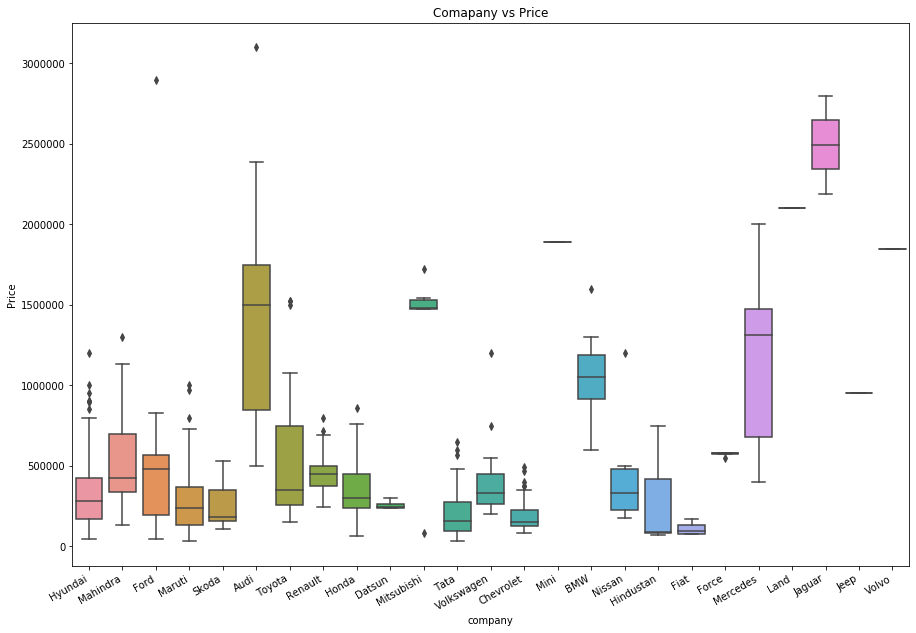

In [30]:
#relation between company and price
plt.subplots(figsize=(15,10))
ax=sns.boxplot(x=CAR['company'],y=CAR['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.title('Comapany vs Price')
plt.show()

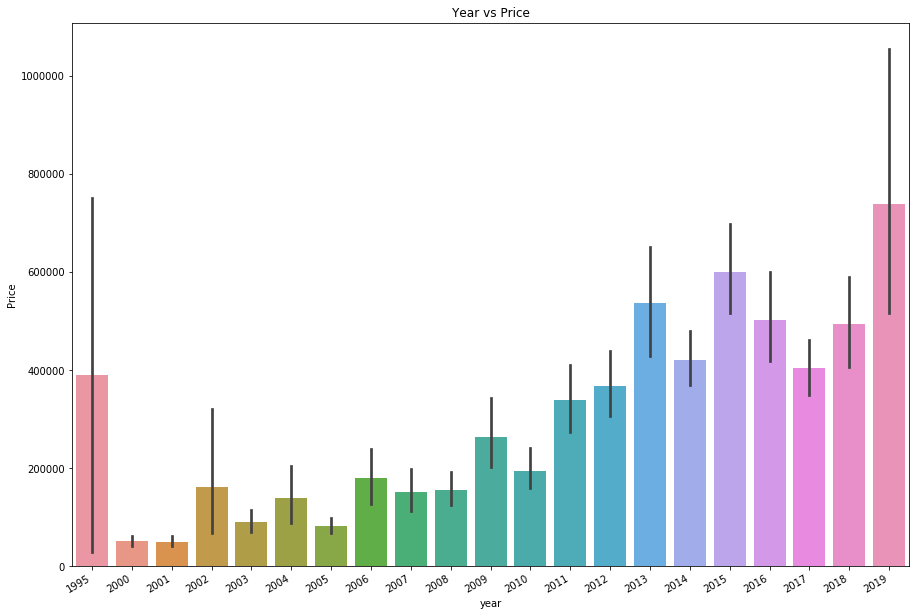

In [31]:
#relation between company and price
plt.subplots(figsize=(15,10))
ax=sns.barplot(x=CAR['year'],y=CAR['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30,ha='right')
plt.title('Year vs Price')
plt.show()

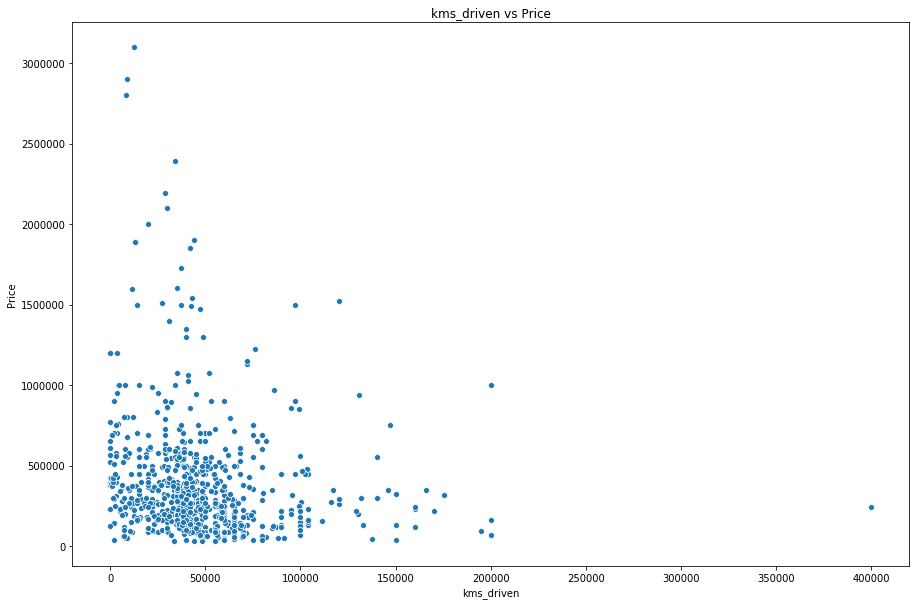

In [32]:
#relation between kms_driven and price
plt.subplots(figsize=(15,10))
ax=sns.scatterplot(x=CAR['kms_driven'],y=CAR['Price'])

plt.title('kms_driven vs Price')
plt.show()

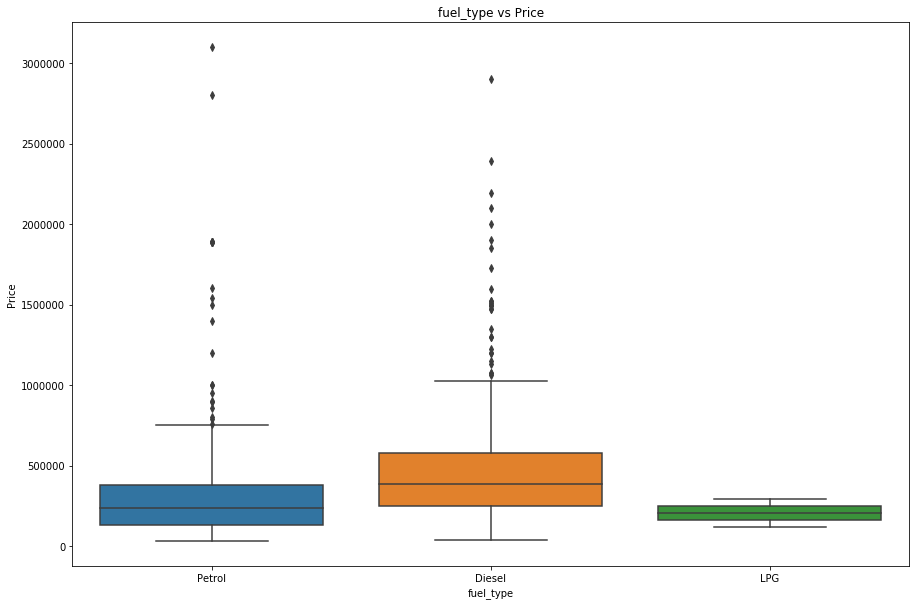

In [33]:
#relation between fuel_type vs price
plt.subplots(figsize=(15,10))
ax=sns.boxplot(x=CAR['fuel_type'],y=CAR['Price'])

plt.title('fuel_type vs Price')
plt.show()

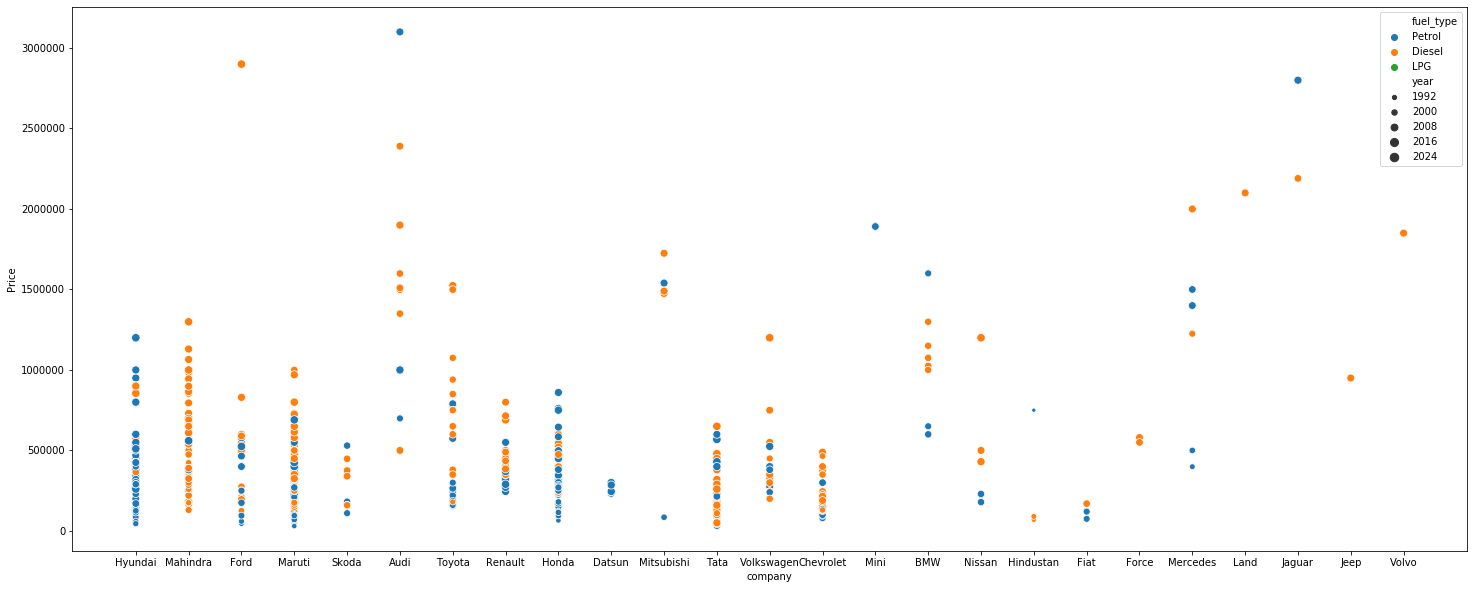

In [34]:
#relation between price vs year,fuel_type & company together.
plt.subplots(figsize=(25,10))
sns.scatterplot(x=CAR['company'],y=CAR['Price'],hue=CAR['fuel_type'],size=CAR['year'])



In [35]:
#Extraction of training data
X=CAR[['name','company','year','kms_driven','fuel_type']]
y=CAR['Price']

In [36]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,36000,Diesel
6,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,27000,Diesel


In [37]:
y.shape

(815,)

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression

In [100]:
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_transformer        
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

In [101]:
OHE=OneHotEncoder()
OHE.fit(X[['name','company','fuel_type']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [104]:
Column_Trans=make_column_transformer((OneHotEncoder(categories=OHE.categories_),['name','company','fuel_type']),
                                    (PolynomialFeatures(degree=20),['kms_driven']),remainder='passthrough')

In [105]:
Column_Trans

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Au...
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                               drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['nam

In [110]:
Lr=LinearRegression()

In [111]:
Pipe=make_pipeline(Column_Trans,Lr)

In [112]:
Pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI qua...
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['name', 'company',
  

In [113]:
scoring_func=make_scorer(r2_score,greater_is_better=False)

In [114]:
-cross_val_score(pipe,X,y,scoring=scoring_func,cv=10)

array([-7.73425991e-03, -3.83441046e-02, -3.96343937e-02, -2.60850438e-02,
       -8.64946962e+08, -2.65242222e-02, -8.06878115e-02, -4.88389936e-02,
       -6.15425735e-03, -7.18093353e-02])

In [115]:
Pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI qua...
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['name', 'company',
  

In [117]:
y_pred=Pipe.predict(X_test)

In [118]:
r2_score(y_test,y_pred)

-0.006240632930939016

In [119]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    Lr=LinearRegression()
    Pipe=make_pipeline(column_trans,lr)
    Pipe.fit(X_train,y_train)
    y_pred=Pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [120]:
np.argmax(scores)

610

In [121]:
scores[np.argmax(scores)]

6.186395840046544e-11

In [135]:
Pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hyundai Santro Xing XO eRLX Euro III','Hyundai',2007,500,'Petrol']).reshape(1,5)))

array([401988.07398484])

In [136]:
CAR[(CAR['name']=='Hyundai Santro Xing XO eRLX Euro III') & (CAR['company']=='Hyundai')].sort_values('year')

,name,company,year,Price,kms_driven,fuel_type
275,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2000,59000,56450,Petrol
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
12,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol


In [137]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
Lr=LinearRegression()
Pipe=make_pipeline(column_trans,lr)
Pipe.fit(X_train,y_train)
y_pred=Pipe.predict(X_test)
r2_score(y_test,y_pred)

6.186395840046544e-11

In [138]:
import pickle

In [139]:
pickle.dump(pipe,open('Linearregression.pkl','wb'))

In [140]:
del Pipe

In [141]:
Pipe=pickle.load(open('LinearRegression.pkl','rb'))

In [144]:
Pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Hyundai Santro Xing XO eRLX Euro III','Hyundai',2007,500,'Petrol']).reshape(1,5)))

array([401988.07398484])

In [145]:
Pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d Sedan', 'BMW 3 Series 320i',
       'BMW 5 Series 520d Sedan', 'BMW 5 Series 530i',
       'BMW 7 Series 740Li Sedan', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d xLine', 'Chevrolet Beat',
       'Chevrolet Beat Diesel', 'Chevrolet Beat LS Diesel',
       'Chevrolet Beat LS Petrol', 'Chevrolet Beat LT Diesel',
       'Chevrolet Beat LT Opt Diesel', 'Chevrolet Beat LT Petrol',
       'Chevrolet Beat PS Diesel', 'Chevrolet Cruze LTZ',
       'Chevrolet Cruze LTZ AT', 'Chevrolet Enjoy',
       'Chevrolet Enjoy 1.4 LS 8 STR', 'Chevrolet Sail 1.2 LS',
       'Chevrolet Sail UVA Petrol LT ABS', 'Chevrolet Spark',
       'Chevrolet Spark 1.0 LT', 'Chevrolet Spark LS 1.0',
       'Chevrolet Spar